In [1]:
import pickle
from PIL import Image
import numpy as np
import quaternion  # 需要安装 numpy-quaternion 库
from utils.visualizations import draw_agent , real_point_to_grid
from utils.angle import turn_angle

/home/getuanhui/anaconda3/envs/ss/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = 'dataset/pickle/v2/greedy(val)/b8cTxDM8gDG/1101454.pkl'
with open(path , 'rb') as f:
    data = pickle.load(f)

In [5]:
pose = data['obs'][-1]['pose']
agent_point = data['path_point'][0][-1]
sound_point = data['path_point'][0][-1]

In [48]:
data['action_id']

[[3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0]]

In [49]:
pose

array([-0.       ,  0.       , -1.5707964,  1.       ], dtype=float32)

In [50]:
agent_point

array([ 5.471956, -3.6784  , -1.020047], dtype=float32)

In [51]:
sound_point

array([-4.528044, -3.6784  , -3.020047], dtype=float32)

In [6]:
turn_angle(pose , sound_point)

79.01186399939958

In [18]:
top_down_map = Image.fromarray(data['map'][0])

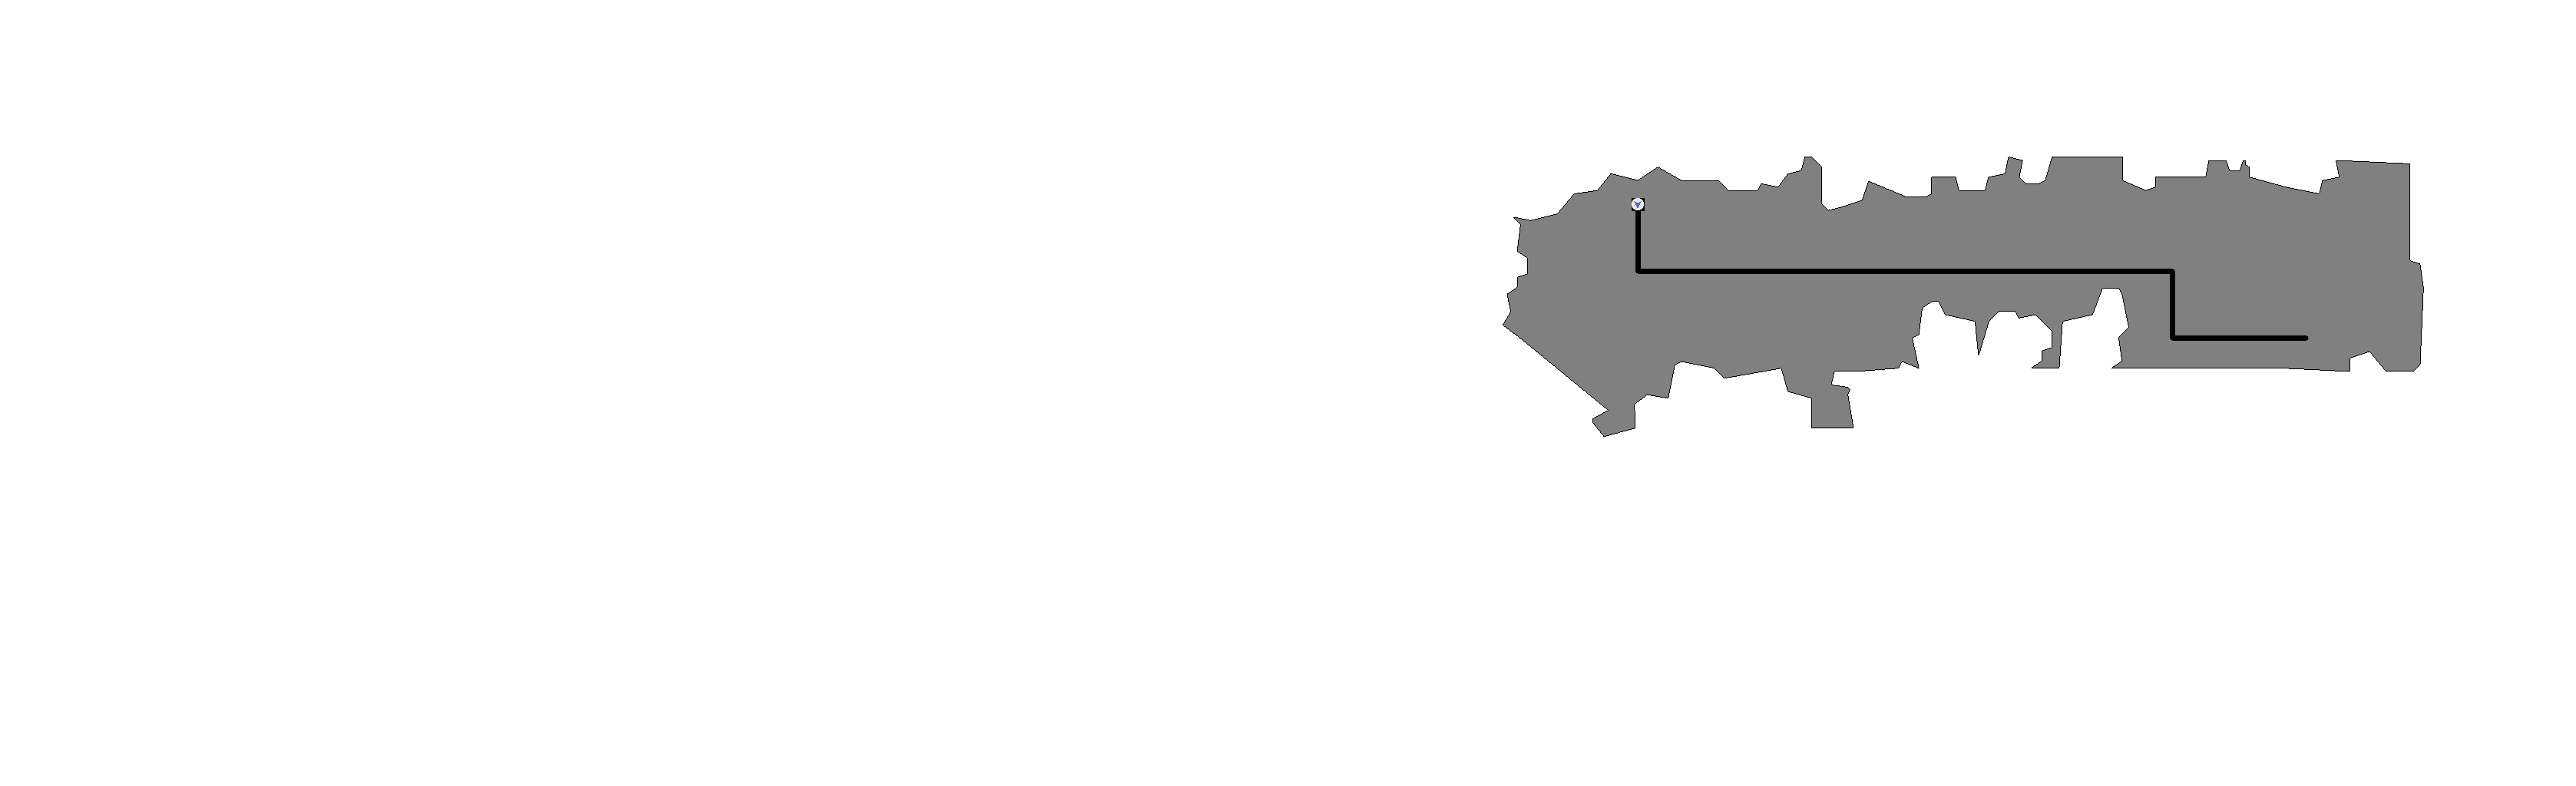

In [19]:
top_down_map

In [15]:
def get_turn_angle(agent_pos, agent_rotation, source_pos):
    agent_pos = np.array(agent_pos, dtype=float)
    source_pos = np.array(source_pos, dtype=float)

    # 转成 quaternion 对象 (w,x,y,z)
    if isinstance(agent_rotation, (list, np.ndarray)):
        agent_rotation = np.quaternion(agent_rotation[0],
                                       agent_rotation[1],
                                       agent_rotation[2],
                                       agent_rotation[3])

    # 声音方向向量
    dir_to_source = source_pos - agent_pos
    
    # 投影到水平面（这里假设 y 是高度，如果 z 是高度请换成 dir_to_source[2] = 0）
    dir_to_source[1] = 0  
    
    # 如果两点重合，直接返回 0
    if np.allclose(dir_to_source, 0):
        return 0.0

    dir_to_source = dir_to_source / np.linalg.norm(dir_to_source)

    # agent 朝向向量
    forward = quaternion.as_rotation_matrix(agent_rotation) @ np.array([0, 0, -1])
    forward[1] = 0
    forward = forward / np.linalg.norm(forward)
    print(forward)
    # 计算夹角
    dot = np.clip(np.dot(forward, dir_to_source), -1.0, 1.0)
    angle = np.degrees(np.arccos(dot))

    # 用叉积判断左右
    cross = np.cross(forward, dir_to_source)
    if cross[1] < 0:  # y轴负说明在右边
        angle = -angle

    return angle


In [40]:
get_turn_angle(agent_point ,pose ,  sound_point)

[-0.93941206  0.         -0.34279   ]


-24.953045736010854